In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


In [65]:
pokemons_df = pd.read_csv('/kaggle/input/pokemon-challenge/pokemon.csv')
combats_df = pd.read_csv('/kaggle/input/pokemon-challenge/combats.csv')
test_df = pd.read_csv('/kaggle/input/pokemon-challenge/tests.csv')
predict_df = test_df.copy()

print(pokemons_df.head())
print(combats_df.head())

   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  
   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


### Mega Evoluções são transformações que certos pokemons podem fazer durante a batalha, os stats aumentam consideravelmente
### Para quem jogou pokemon das novas gerações sabe que eles podem ser mais fortes que pokemons lendários por isso decidi adicionar no dataset

![](https://archives.bulbagarden.net/media/upload/thumb/0/0f/X_full_Mega_Evolution_Adventures.png/764px-X_full_Mega_Evolution_Adventures.png)

In [66]:
# Adicionando coluna de Mega evoluções
pokemons_df['Mega'] = 0

pokemons_df['Mega'] = np.where(pokemons_df['Name'].str.contains('Mega '), 1, pokemons_df['Mega'])

print(pokemons_df.loc[pokemons_df['Name']=='Mega Tyranitar'])
print(pokemons_df['Mega'])

       #            Name Type 1 Type 2   HP  Attack  Defense  Sp. Atk  \
268  269  Mega Tyranitar   Rock   Dark  100     164      150       95   

     Sp. Def  Speed  Generation  Legendary  Mega  
268      120     71           2      False     1  
0      0
1      0
2      0
3      1
4      0
      ..
795    0
796    1
797    0
798    0
799    0
Name: Mega, Length: 800, dtype: int64


In [67]:
# Substituir o # de cada pokemon pelo seu nome
# seguro pois cada pokemon tem um nome único
name_dict = dict(zip(pokemons_df['#'], pokemons_df['Name']))
combats_name_df = combats_df[['First_pokemon', 'Second_pokemon', 'Winner']].replace(name_dict)
print(combats_name_df.head())

  First_pokemon Second_pokemon     Winner
0      Larvitar        Nuzleaf    Nuzleaf
1      Virizion      Terrakion  Terrakion
2       Togetic       Beheeyem   Beheeyem
3        Slugma      Druddigon  Druddigon
4       Omastar        Shuckle    Omastar


### Youngster Joey é um personagem recorrente dos jogos e até mesmo do manga! Decidi montar uma história em que o player e o youngster joey batalham 100.000 vezes pra ver quem vence mais

![](https://archives.bulbagarden.net/media/upload/7/7e/Joey_Adventures.png)


In [68]:
# Conta em formato de dict quantas vezes o primeiro pokemon apareceu
Player = combats_name_df['First_pokemon'].value_counts()

# Conta em formato de dict quantas vezes o segundo pokemon apareceu
Youngster_Joey  = combats_name_df['Second_pokemon'].value_counts()

# Conta em formato de dict quantas vezes o primeiro ou segundo pokemon apareceu como vencedor
winners_count = combats_name_df['Winner'].value_counts()

print(winners_count)

# Soma os dois df, caso ele encontre o mesmo pokemon nos dois df por exemplo:
# battle1['Pikachu']=10 e battle2['Pikachu']=20 então ele soma
# resultando em total_battles['Pikachu']=30
total_battles = Player + Youngster_Joey
win_percent = winners_count / total_battles

win_percent.sort_values(inplace=True)

print(win_percent)

# Shuckle com NaN? Naturalmente ele não venceu nenhuma luta

Mewtwo        152
Infernape     136
Aerodactyl    136
Jirachi       134
Slaking       133
             ... 
Munna           5
Slugma          4
Solosis         4
Silcoon         3
Togepi          3
Name: Winner, Length: 782, dtype: int64
Silcoon                   0.021739
Togepi                    0.024590
Solosis                   0.031008
Slugma                    0.032520
Munna                     0.039062
                            ...   
Mega Beedrill             0.966387
Tornadus Therian Forme    0.968000
Weavile                   0.974790
Mega Aerodactyl           0.984496
Shuckle                        NaN
Length: 783, dtype: float64


### Shuckle é um pokemon com uma defesa altíssima porém com um ataque quase inexistente portanto seria muito difícil ele ganhar alguma batalha sem usar algum tipo de estratégia

![](https://pm1.narvii.com/6793/9e0c69feb7d05ce31ee5745e4c9c683580afa28dv2_hq.jpg)

In [69]:
# Diferença de vitórias entre Mega evolução e evolução normal
print(win_percent['Blaziken'])
print(win_percent['Mega Blaziken'])

0.6422764227642277
0.8455284552845529


In [70]:
# Drop do coitado do Shuckle
win_percent.dropna(inplace=True)

In [71]:
# Checar se tem mais algum null
pokemons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
 12  Mega        800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [72]:
# Name com 799 ao invés de 800, parece que temos um name null
# Type 2 é normal ter alguns valores como null já existem pokemons monotypes
pokemons_df.loc[pokemons_df['Name'].isnull()==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False,1


In [73]:
# Qual será o pokemon? Vamos checar um na frente
pokemons_df.loc[pokemons_df['#']==62]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False,0


### Mankey, então, obviamente, o nosso null é o Primeape meu pokemon favorito da primeira geração

![](https://archives.bulbagarden.net/media/upload/thumb/e/e6/Primeape_Adventures.png/200px-Primeape_Adventures.png)

In [74]:
# Substituindo o nome
pokemons_df['Name'] = pokemons_df['Name'].fillna('Primeape')

# Vamos substituir o 'NaN' da coluna Type 2
pokemons_df['Type 2'] = pokemons_df['Type 2'].fillna('')
print(pokemons_df['Legendary'])
# Também vamos descategorizar o Legendary
pokemons_df['Legendary'] = pokemons_df['Legendary'].map({False: 0, True:1})
print(pokemons_df['Legendary'])

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool
0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 800, dtype: int64


In [75]:
combats_df.rename(columns = {'First_pokemon':'#'}, inplace = True)
combats_df.head()

,#,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [76]:
Player_stats = combats_df.merge(pokemons_df, on='#', how='left')
Player_stats.head()


,#,Second_pokemon,Winner,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,50,41,2,0,0
1,702,701,701,Virizion,Grass,Fighting,91,90,72,90,129,108,5,1,0
2,191,668,668,Togetic,Fairy,Flying,55,40,85,80,105,40,2,0,0
3,237,683,683,Slugma,Fire,,40,40,40,70,40,20,2,0,0
4,151,231,151,Omastar,Rock,Water,70,60,125,115,70,55,1,0,0


In [77]:
Youngster_Joey_stats = pokemons_df.rename(columns = {'#':'Second_pokemon'})
Youngster_Joey_stats.head()

,Second_pokemon,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,1
4,5,Charmander,Fire,,39,52,43,60,50,65,1,0,0


In [78]:
# Renomear colunas Youngster Joey 
Youngster_Joey_stats.rename(columns = {'Name':'Name_yj','Type 1':'Type 1_yj','Type 2':'Type 2_yj',
                          'HP':'HP_yj','Attack':'Attack_yj','Defense':'Defense_yj',
                          'Sp. Atk':'Sp. Atk_yj','Sp. Def':'Sp. Def_yj','Speed':'Speed_yj',
                          'Generation':'Generation_yj','Legendary':'Legendary_yj', 'Mega':'Mega_yj'
                         }, inplace = True)
Youngster_Joey_stats.head()

,Second_pokemon,Name_yj,Type 1_yj,Type 2_yj,HP_yj,Attack_yj,Defense_yj,Sp. Atk_yj,Sp. Def_yj,Speed_yj,Generation_yj,Legendary_yj,Mega_yj
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,1
4,5,Charmander,Fire,,39,52,43,60,50,65,1,0,0


In [79]:
# Join dos dois df, vira um 'card' da batalha
matches = Player_stats.merge(Youngster_Joey_stats, on='Second_pokemon', how='left')
matches.head()


,#,Second_pokemon,Winner,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,...,Type 2_yj,HP_yj,Attack_yj,Defense_yj,Sp. Atk_yj,Sp. Def_yj,Speed_yj,Generation_yj,Legendary_yj,Mega_yj
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,...,Dark,70,70,40,60,40,60,3,0,0
1,702,701,701,Virizion,Grass,Fighting,91,90,72,90,...,Fighting,91,129,90,72,90,108,5,1,0
2,191,668,668,Togetic,Fairy,Flying,55,40,85,80,...,,75,75,75,125,95,40,5,0,0
3,237,683,683,Slugma,Fire,,40,40,40,70,...,,77,120,90,60,90,48,5,0,0
4,151,231,151,Omastar,Rock,Water,70,60,125,115,...,Rock,20,10,230,10,230,5,2,0,0


In [80]:
matches['Winner'] = np.where(matches['Winner']== matches['#'], 1,0)

matches.head()

,#,Second_pokemon,Winner,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,...,Type 2_yj,HP_yj,Attack_yj,Defense_yj,Sp. Atk_yj,Sp. Def_yj,Speed_yj,Generation_yj,Legendary_yj,Mega_yj
0,266,298,0,Larvitar,Rock,Ground,50,64,50,45,...,Dark,70,70,40,60,40,60,3,0,0
1,702,701,0,Virizion,Grass,Fighting,91,90,72,90,...,Fighting,91,129,90,72,90,108,5,1,0
2,191,668,0,Togetic,Fairy,Flying,55,40,85,80,...,,75,75,75,125,95,40,5,0,0
3,237,683,0,Slugma,Fire,,40,40,40,70,...,,77,120,90,60,90,48,5,0,0
4,151,231,1,Omastar,Rock,Water,70,60,125,115,...,Rock,20,10,230,10,230,5,2,0,0


In [81]:
# Preparando para treinar
# Drop colunas não necessárias
matches= matches.drop(['#','Second_pokemon','Name','Name_yj'], axis=1)

In [82]:
# Separando coluna Winner para ser usada mais tarde
matches.head()
winners_arr= matches['Winner']
Player_matches = matches.drop(['Winner'], axis=1)
Player_matches.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_yj,HP_yj,Attack_yj,Defense_yj,Sp. Atk_yj,Sp. Def_yj,Speed_yj,Generation_yj,Legendary_yj,Mega_yj
0,Rock,Ground,50,64,50,45,50,41,2,0,...,Dark,70,70,40,60,40,60,3,0,0
1,Grass,Fighting,91,90,72,90,129,108,5,1,...,Fighting,91,129,90,72,90,108,5,1,0
2,Fairy,Flying,55,40,85,80,105,40,2,0,...,,75,75,75,125,95,40,5,0,0
3,Fire,,40,40,40,70,40,20,2,0,...,,77,120,90,60,90,48,5,0,0
4,Rock,Water,70,60,125,115,70,55,1,0,...,Rock,20,10,230,10,230,5,2,0,0


#### Essa parte devo admitir que não perdi muito tempo pois eu já sabia como calcular a diferença entre os status dos pokemons, porém utilizei uma forma simplificada, onde o divido o atk/def e o sp. atk/sp. def e o restante eu só subtraio

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4445736b8e1e8be597cf7901e4ad0be60b54d1ab)

In [83]:
not_stats = ['Type 1', 'Type 1_yj','Type 2', 'Type 2_yj', 'Generation', 'Generation_yj', 'Legendary', 'Legendary_yj', 'Mega', 'Mega_yj']
not_player = ['Speed_yj','HP_yj','Attack_yj','Defense_yj','Sp. Atk_yj','Sp. Def_yj']
not_yj = ['Speed','HP','Attack','Defense','Sp. Atk','Sp. Def'] 



# Calcular diferença do stats
Player_matches2 = Player_matches.copy()

Youngster_Joey_matches = Player_matches.copy()
Youngster_Joey_matches2 = Youngster_Joey_matches.copy()
Youngster_Joey_matches['Type 1'] = Player_matches['Type 1_yj']
Youngster_Joey_matches['Type 2'] = Player_matches['Type 2_yj']
Youngster_Joey_matches['Type 1_yj'] = Player_matches['Type 1']
Youngster_Joey_matches['Type 2_yj'] = Player_matches['Type 2']
Youngster_Joey_matches['Generation'] = Player_matches['Generation_yj']
Youngster_Joey_matches['Legendary'] = Player_matches['Legendary_yj']
Youngster_Joey_matches['Mega'] = Player_matches['Mega_yj']


for column, column2 in zip(Player_matches2, Youngster_Joey_matches2):
    if column not in not_stats and column not in not_player: 
        #Player_matches[column+'_diff'] = Player_matches2[column] - Player_matches2[column+'_yj']
        if column == 'Attack':
            Player_matches[column+'_diff'] = Player_matches2[column]/Player_matches2['Defense_yj']
        #elif column == 'Defense':
        #    Player_matches[column+'_diff'] = Player_matches2[column]/Player_matches2['Attack_yj']
        elif column == 'Sp. Atk':
            Player_matches[column+'_diff'] = Player_matches2[column]/Player_matches2['Sp. Def_yj']
        #elif column == 'Sp. Def':
       #     Player_matches[column+'_diff'] = Player_matches2[column]/Player_matches2['Sp. Atk_yj']
        else:
            Player_matches[column+'_diff'] = Player_matches2[column] - Player_matches2[column+'_yj']
    if column2 not in not_stats and column2 not in not_yj: 
        #Player_matches[column+'_diff'] = Player_matches2[column] - Player_matches2[column+'_yj']
        new_column_name = column2.replace('_yj', '')
        if column2 == 'Attack_yj':
            Youngster_Joey_matches[new_column_name+'_diff'] = Youngster_Joey_matches2[column2]/Youngster_Joey_matches2['Defense']
        #elif column2 == 'Defense_yj':
        #    Youngster_Joey_matches[new_column_name+'_diff'] = Youngster_Joey_matches2[column2]/Youngster_Joey_matches2['Attack']
        elif column2 == 'Sp. Atk_yj':
            Youngster_Joey_matches[new_column_name+'_diff'] = Youngster_Joey_matches2[column2]/Youngster_Joey_matches2['Sp. Def']
        #elif column2 == 'Sp. Def_yj':
        #    Youngster_Joey_matches[new_column_name+'_diff'] = Youngster_Joey_matches2[column2]/Youngster_Joey_matches2['Sp. Atk']
        else:
            Youngster_Joey_matches[new_column_name+'_diff'] = Youngster_Joey_matches2[column2] - Youngster_Joey_matches2[new_column_name]
        




In [84]:
# Drop das colunas de stats pois já fizemos o cálculo necessário        
Player_matches = Player_matches.drop(['Speed','Speed_yj','HP','HP_yj','Attack','Attack_yj',
                      'Defense','Defense_yj','Sp. Atk','Sp. Atk_yj',
                     'Sp. Def','Sp. Def_yj'], axis=1)
Youngster_Joey_matches = Youngster_Joey_matches.drop(['Speed','Speed_yj','HP','HP_yj','Attack','Attack_yj',
                      'Defense','Defense_yj','Sp. Atk','Sp. Atk_yj',
                     'Sp. Def','Sp. Def_yj'], axis=1)

print(Player_matches.head())

print(Youngster_Joey_matches.head())

  Type 1    Type 2  Generation  Legendary  Mega Type 1_yj Type 2_yj  \
0   Rock    Ground           2          0     0     Grass      Dark   
1  Grass  Fighting           5          1     0      Rock  Fighting   
2  Fairy    Flying           2          0     0   Psychic             
3   Fire                     2          0     0    Dragon             
4   Rock     Water           1          0     0       Bug      Rock   

   Generation_yj  Legendary_yj  Mega_yj  HP_diff  Attack_diff  Defense_diff  \
0              3             0        0      -20     1.600000            10   
1              5             1        0        0     1.000000           -18   
2              5             0        0      -20     0.533333            10   
3              5             0        0      -37     0.444444           -50   
4              2             0        0       50     0.260870          -105   

   Sp. Atk_diff  Sp. Def_diff  Speed_diff  
0      1.125000            10         -19  
1      1.0

In [85]:
# Concatenando as batalhas dos dois treinadores onde eles trocam de pokemons para prover mais dados para o algo

matches = pd.concat([Player_matches,Youngster_Joey_matches])

#matches= matches.drop(['Generation','Generation_yj'], axis=1)

#matches = Player_matches.copy()

print(matches.head())

matches.shape

  Type 1    Type 2  Generation  Legendary  Mega Type 1_yj Type 2_yj  \
0   Rock    Ground           2          0     0     Grass      Dark   
1  Grass  Fighting           5          1     0      Rock  Fighting   
2  Fairy    Flying           2          0     0   Psychic             
3   Fire                     2          0     0    Dragon             
4   Rock     Water           1          0     0       Bug      Rock   

   Generation_yj  Legendary_yj  Mega_yj  HP_diff  Attack_diff  Defense_diff  \
0              3             0        0      -20     1.600000            10   
1              5             1        0        0     1.000000           -18   
2              5             0        0      -20     0.533333            10   
3              5             0        0      -37     0.444444           -50   
4              2             0        0       50     0.260870          -105   

   Sp. Atk_diff  Sp. Def_diff  Speed_diff  
0      1.125000            10         -19  
1      1.0

(100000, 16)

In [86]:
# Fazendo np array de wins

wins_arr = np.array(winners_arr)
wins_arr2 = np.array(winners_arr)

# Resultado do Youngster Joey deve ser o reverso do Player
for i in range(len(wins_arr2)):
    if wins_arr2[i] == 1:
        wins_arr2[i] = 0
    else:
        wins_arr2[i] = 1

winners_arr = np.concatenate((wins_arr, wins_arr2), axis=0)

print(wins_arr)
print(wins_arr2)

[0 0 0 ... 0 1 1]
[1 1 1 ... 1 0 0]


**QUE COMECE AS BATALHAS!**

![](https://i.kym-cdn.com/photos/images/newsfeed/000/479/142/372.jpg)

In [87]:
# Treinar
from sklearn.model_selection import train_test_split
x1, x2 , y1, y2 =  train_test_split(matches , winners_arr, test_size=0.25, random_state=42)

In [88]:
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

categorical_features =  np.where(matches.dtypes == object )[0]

model = CatBoostClassifier(iterations=50,logging_level= 'Silent')
model.fit(x1, y1, cat_features=categorical_features)
prediction = model.predict(x2)
result = roc_auc_score(y2,prediction)
print("CatBoostClassifier:",result)

CatBoostClassifier: 0.9402507804340413


### Dei um google até achar como eu mostrava a importância de cada var no algo, foi uma satisfação inequalável checar que a coluna que eu introduzi 'Mega' foi mais importante que a 'Legendary' que o autor do data set fez!

Text(0.5, 1.0, 'Feature Importance')

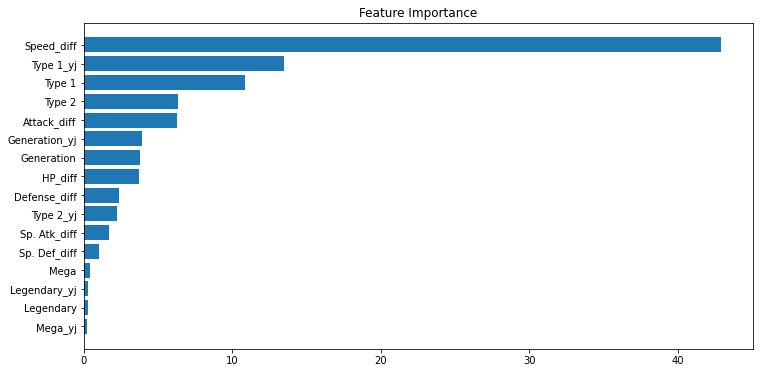

In [89]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x1.columns)[sorted_idx])
plt.title('Feature Importance')



In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2, prediction, labels=[1, 0]))
acc = accuracy_score(y2, prediction)

print("Acurácia: {:.2f}".format(acc))

[[11790   683]
 [  811 11716]]
Acurácia: 0.94


In [91]:
# Transformando dados categóricos
matches = pd.get_dummies(matches,columns=["Type 1","Type 2", "Type 1_yj", "Type 2_yj"])

matches.head()

,Generation,Legendary,Mega,Generation_yj,Legendary_yj,Mega_yj,HP_diff,Attack_diff,Defense_diff,Sp. Atk_diff,...,Type 2_yj_Ghost,Type 2_yj_Grass,Type 2_yj_Ground,Type 2_yj_Ice,Type 2_yj_Normal,Type 2_yj_Poison,Type 2_yj_Psychic,Type 2_yj_Rock,Type 2_yj_Steel,Type 2_yj_Water
0,2,0,0,3,0,0,-20,1.600000,10,1.125000,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,5,1,0,0,1.000000,-18,1.000000,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,5,0,0,-20,0.533333,10,0.842105,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,5,0,0,-37,0.444444,-50,0.777778,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2,0,0,50,0.260870,-105,0.500000,...,0,0,0,0,0,0,0,1,0,0


In [92]:
# Segundo Treino
x1, x2, y1, y2 =  train_test_split(matches, winners_arr, test_size=0.25, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
model = RandomForestClassifier(n_estimators=100).fit(x1, y1)
prediction = model.predict(x2)
result = roc_auc_score(y2,prediction)
print("RandomForestClassifier:",result)

RandomForestClassifier: 0.9466819112391252


In [94]:
print(confusion_matrix(y2, prediction, labels=[1, 0]))
acc = accuracy_score(y2, prediction)
print("Acurácia: {:.2f}".format(acc))

[[11819   654]
 [  679 11848]]
Acurácia: 0.95


Text(0.5, 1.0, 'Feature Importance')

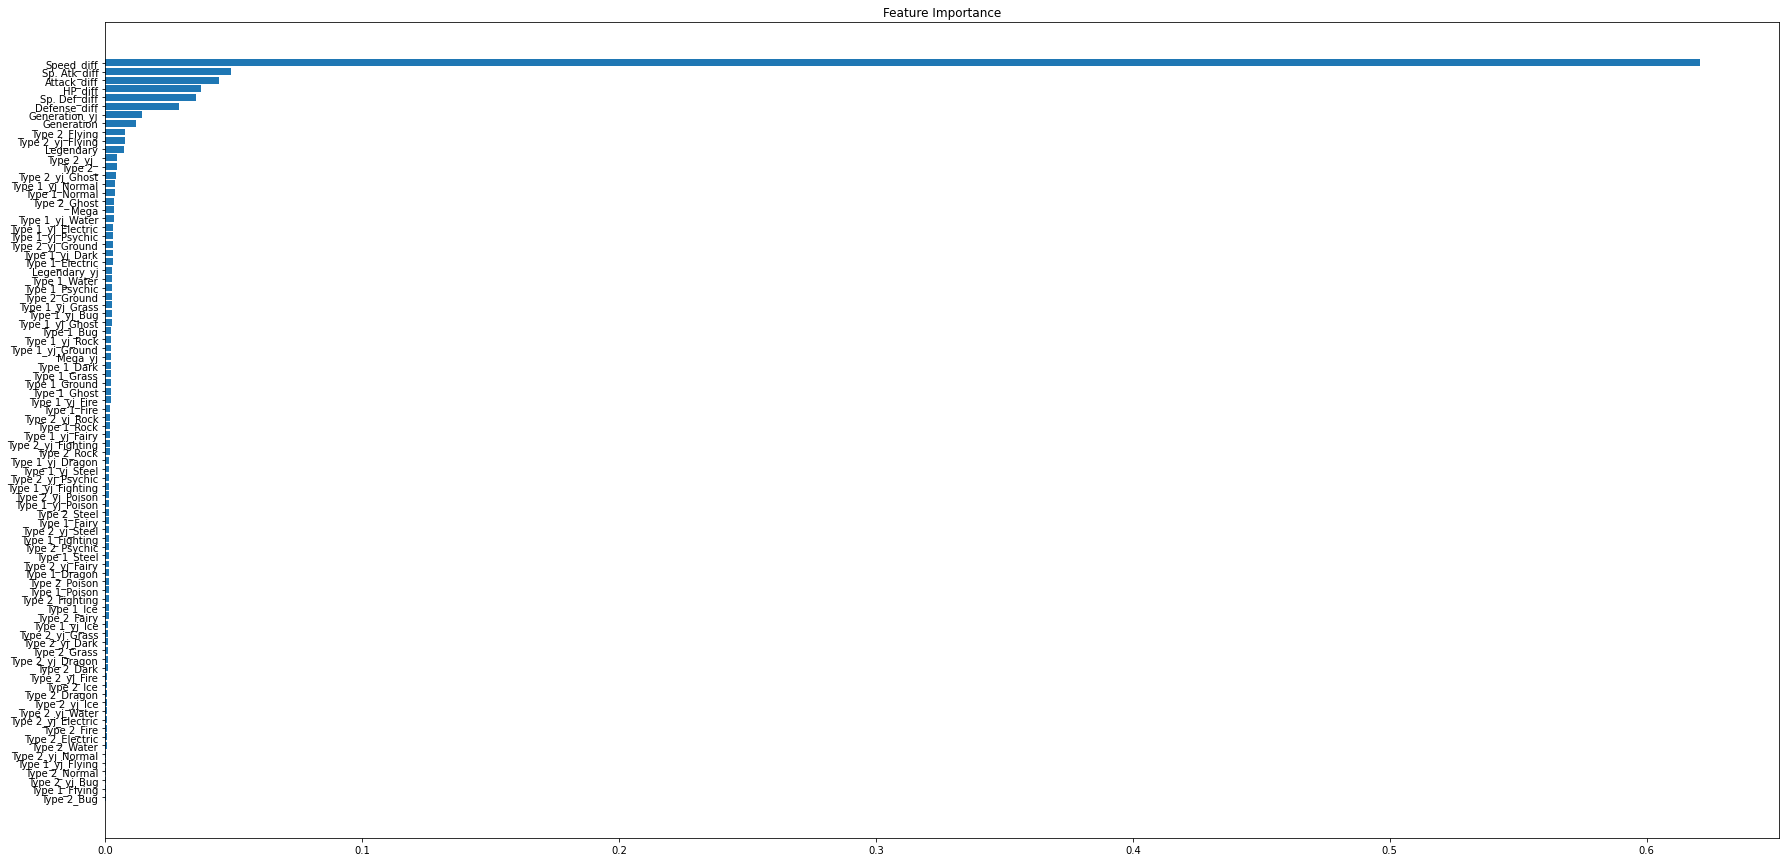

In [95]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(30, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x1.columns)[sorted_idx])
plt.title('Feature Importance')